In [88]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#np.random.seed(101)

# Reading the data

In [89]:
data = pd.read_csv("F:\machinfy\mohamed\dina.csv", sep=',',encoding="utf-8")

In [90]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [91]:
### Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7000.000000,7043,7043,6896.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,1552-CZCLL,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.163143,NaN,NaN,33.041473,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300440,NaN
std,NaN,NaN,0.369522,NaN,NaN,24.382260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [93]:
data.SeniorCitizen.value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [94]:
data.tenure.value_counts()

1.0     477
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     50
Name: tenure, Length: 72, dtype: int64

In [95]:
data.MonthlyCharges.mod(data.TotalCharges,fill_value=None)

0         0.00
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Length: 7043, dtype: float64

In [96]:
data.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [201]:
data.TotalCharges.value_counts()

2283.30    12
20.20      11
19.75       9
20.05       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [97]:
data.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [99]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [100]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [101]:
data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [102]:
data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [103]:
data.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [104]:
data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [83]:
data.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [105]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [106]:
data.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [107]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

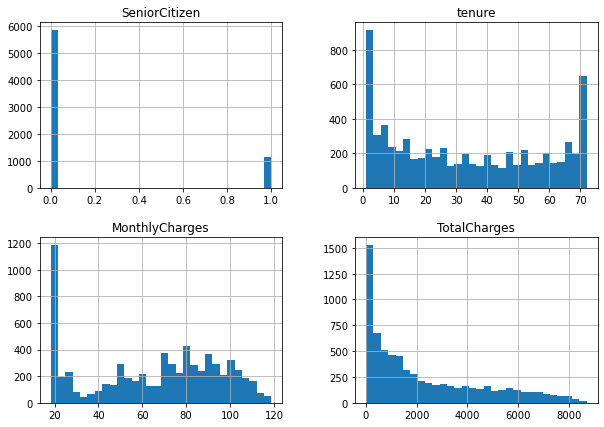

In [108]:
data.hist(bins=30 , figsize=(10,7))
plt.show

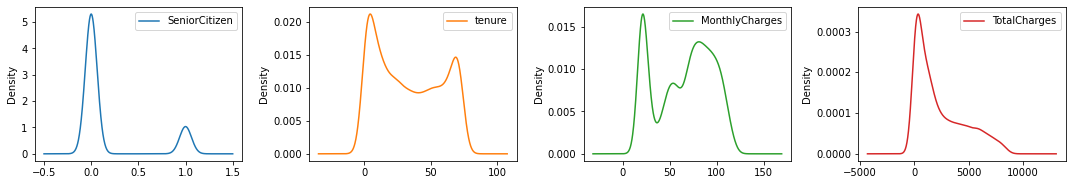

In [109]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

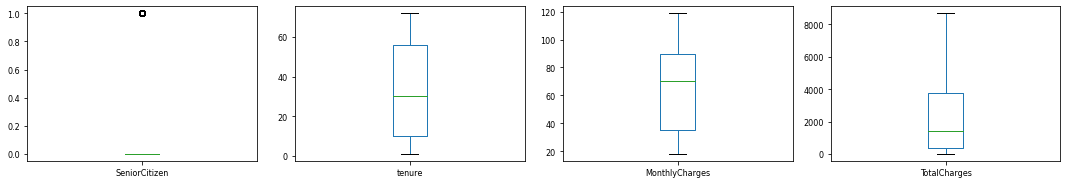

In [110]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False,
fontsize=8,figsize=(15,10))
plt.tight_layout()

In [111]:
d_corr = data.corr()
d_corr.style.background_gradient()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.013521,0.221101,0.102831
tenure,0.013521,1.000000,0.238635,0.822171
MonthlyCharges,0.221101,0.238635,1.000000,0.650468
TotalCharges,0.102831,0.822171,0.650468,1.000000


<AxesSubplot:>

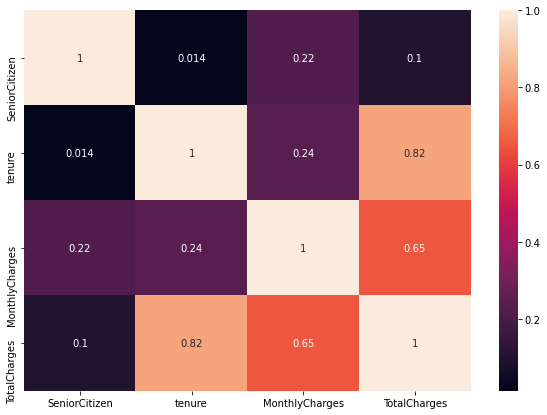

In [112]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


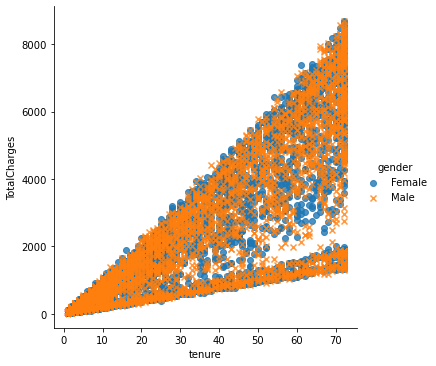

In [46]:
sns.lmplot('tenure', 'TotalCharges', data=data, hue='gender',markers=["o", "x"],
   legend=True,
 fit_reg=False, height=5)
plt.show()

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


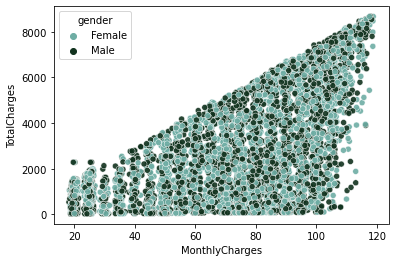

In [73]:
sns.scatterplot('MonthlyCharges','TotalCharges',data=data, hue='gender',markers=["o", "x"],alpha=0.9
  , legend=True,palette=("ch:2,r=.2,l=.6"))
plt.show()

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


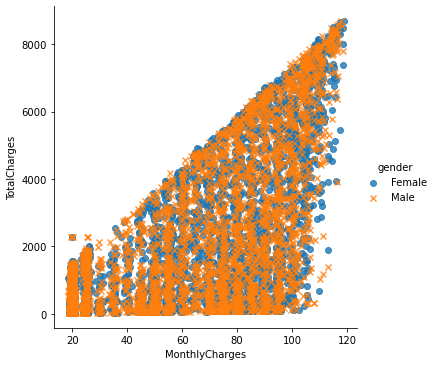

In [47]:
sns.lmplot('MonthlyCharges', 'TotalCharges', data=data, hue='gender',markers=["o", "x"],
   legend=True,
 fit_reg=False, height=5)
plt.show()

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

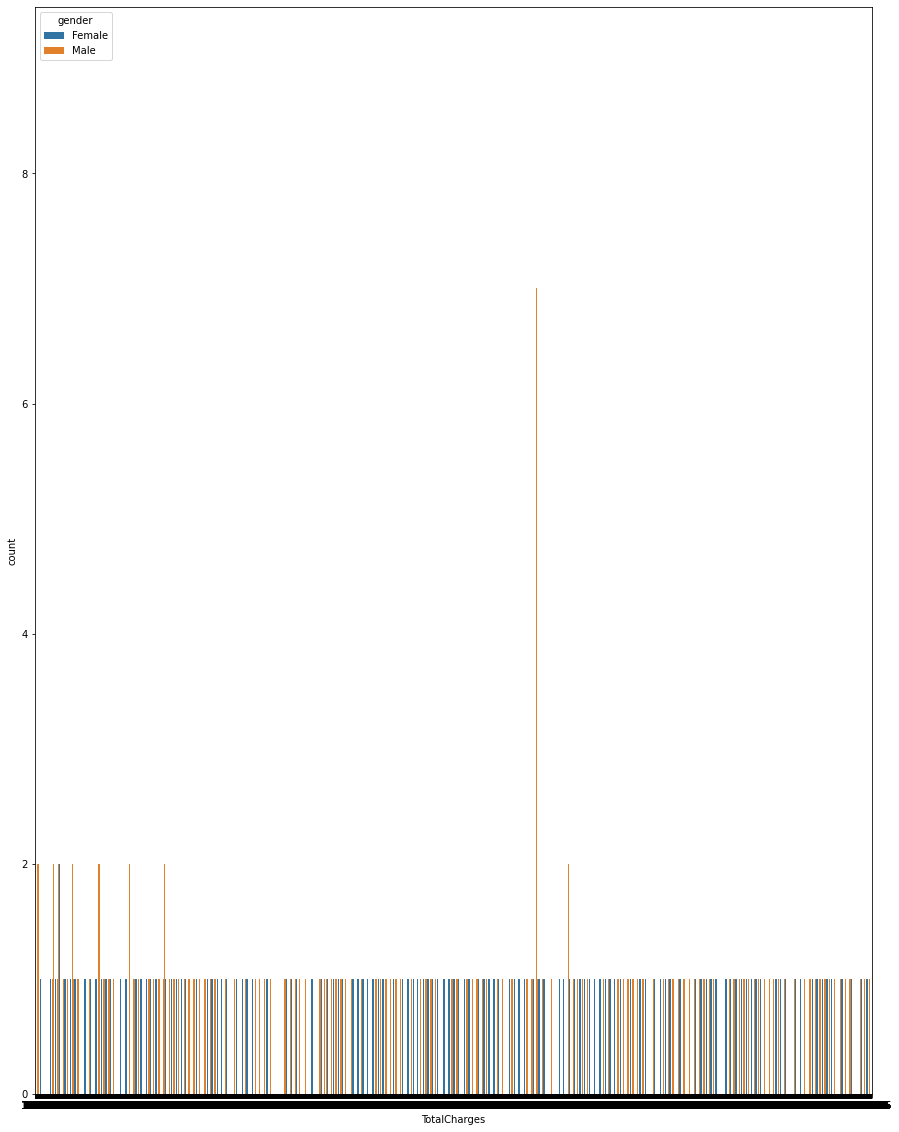

In [64]:
plt.figure(figsize=(15,20))
sns.countplot(x= 'TotalCharges', data=data, hue='gender')

<Figure size 504x504 with 0 Axes>

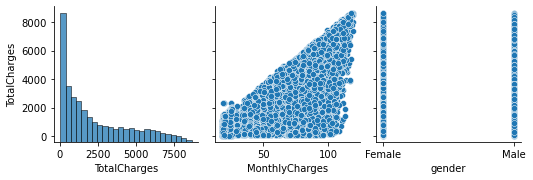

In [68]:
plt.figure(figsize=(7,7))
sns.pairplot(data, y_vars= 'TotalCharges', x_vars=['TotalCharges','MonthlyCharges','gender'])
plt.show()

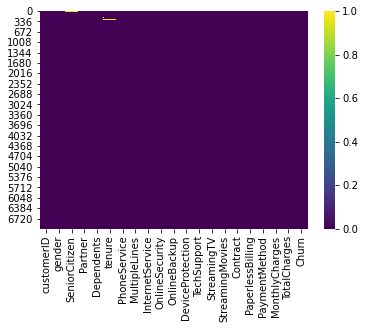

In [113]:
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

In [115]:
data.tenure.replace(np.nan,data.tenure.mean(),inplace=True)

In [116]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen       43
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [117]:
data.SeniorCitizen.replace(np.nan,0,inplace=True)       

In [118]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
data['gender'].replace("Male",0,inplace=True)
data['gender'].replace("Female",1,inplace= True)

In [119]:
data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [120]:
data.PhoneService.replace('Yes',0,inplace=True)
data.PhoneService.replace('No',1,inplace=True)


In [121]:
data.describe()

,SeniorCitizen,tenure,PhoneService,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,33.041473,0.096834,64.761692,2283.300440
std,0.368612,24.126431,0.295752,30.090047,2265.000258
min,0.000000,1.000000,0.000000,18.250000,18.800000
25%,0.000000,10.000000,0.000000,35.500000,402.225000
50%,0.000000,31.000000,0.000000,70.350000,1400.550000
75%,0.000000,55.000000,0.000000,89.850000,3786.600000
max,1.000000,72.000000,1.000000,118.750000,8684.800000


In [33]:
data.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [124]:
data.Partner.replace('Yes',0,inplace=True)
data.Partner.replace('No',1,inplace=True)


In [125]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [126]:
data.InternetService.replace('Fiber optic',0,inplace=True)
data.InternetService.replace('DSL',1,inplace=True)
data.InternetService.replace('No',2,inplace=True)

In [127]:
data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [128]:
data.OnlineSecurity.replace('Yes',0,inplace=True)
data.OnlineSecurity.replace('No',1,inplace=True)
data.OnlineSecurity.replace('No internet service',2,inplace=True)

In [130]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [149]:
data.PaymentMethod.replace('Electronic check',0,inplace=True)
data.PaymentMethod.replace('Mailed check ',1,inplace=True)
data.PaymentMethod.replace('Bank transfer',2,inplace=True)
data.PaymentMethod.replace('Credit card',3,inplace=True)



In [150]:
data.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.0,33.041473,0.096834,0.777084,0.930001,64.761692,2283.300440
std,0.500013,0.368612,0.0,24.126431,0.295752,0.778877,0.706051,30.090047,2265.000258
min,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.0,10.000000,0.000000,0.000000,0.000000,35.500000,402.225000
50%,0.000000,0.000000,0.0,31.000000,0.000000,1.000000,1.000000,70.350000,1400.550000
75%,1.000000,0.000000,0.0,55.000000,0.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,0.0,72.000000,1.000000,2.000000,2.000000,118.750000,8684.800000


In [144]:
data_corr=data.corr()
data_corr.style.background_gradient()

C:\Users\Qebaa\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\Qebaa\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges
gender,1.000000,0.001874,nan,-0.010031,-0.006488,-0.010380,-0.014418,0.014569,-0.000048
SeniorCitizen,0.001874,1.000000,nan,0.013338,-0.008576,-0.259390,-0.081878,0.220173,0.102395
Partner,nan,nan,nan,nan,nan,nan,nan,nan,nan
tenure,-0.010031,0.013338,nan,1.000000,-0.005542,-0.025102,-0.223622,0.236084,0.814245
PhoneService,-0.006488,-0.008576,nan,-0.005542,1.000000,0.093720,-0.159989,-0.247398,-0.112851
InternetService,-0.010380,-0.259390,nan,-0.025102,0.093720,1.000000,0.582325,-0.905491,-0.427749
OnlineSecurity,-0.014418,-0.081878,nan,-0.223622,-0.159989,0.582325,1.000000,-0.635534,-0.482445
MonthlyCharges,0.014569,0.220173,nan,0.236084,-0.247398,-0.905491,-0.635534,1.000000,0.650468
TotalCharges,-0.000048,0.102395,nan,0.814245,-0.112851,-0.427749,-0.482445,0.650468,1.000000


In [134]:
data_corr

,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,NaN,0.013338,-0.008576,-0.259390,-0.081878,0.220173,0.102395
Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,0.013338,NaN,1.000000,-0.005542,-0.025102,-0.223622,0.236084,0.814245
PhoneService,-0.008576,NaN,-0.005542,1.000000,0.093720,-0.159989,-0.247398,-0.112851
InternetService,-0.259390,NaN,-0.025102,0.093720,1.000000,0.582325,-0.905491,-0.427749
OnlineSecurity,-0.081878,NaN,-0.223622,-0.159989,0.582325,1.000000,-0.635534,-0.482445
MonthlyCharges,0.220173,NaN,0.236084,-0.247398,-0.905491,-0.635534,1.000000,0.650468
TotalCharges,0.102395,NaN,0.814245,-0.112851,-0.427749,-0.482445,0.650468,1.000000


In [143]:
data_corr.TotalCharges.sort_values()

OnlineSecurity    -0.482445
InternetService   -0.427749
PhoneService      -0.112851
SeniorCitizen      0.102395
MonthlyCharges     0.650468
tenure             0.814245
TotalCharges       1.000000
Partner                 NaN
Name: TotalCharges, dtype: float64

<AxesSubplot:>

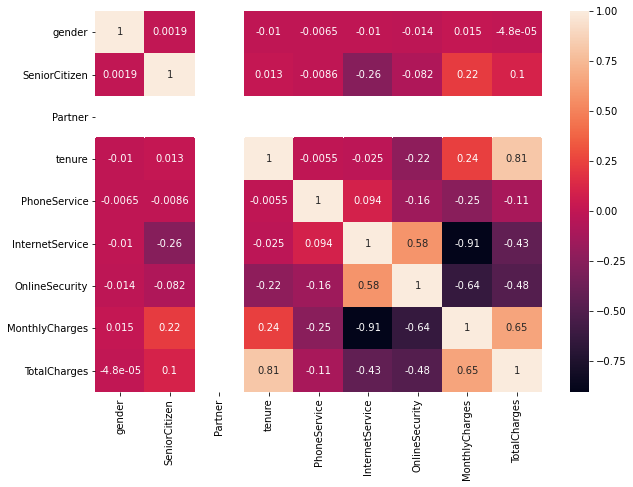

In [146]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

In [155]:
data.drop("Partner",axis=1 ,inplace=True)

<AxesSubplot:>

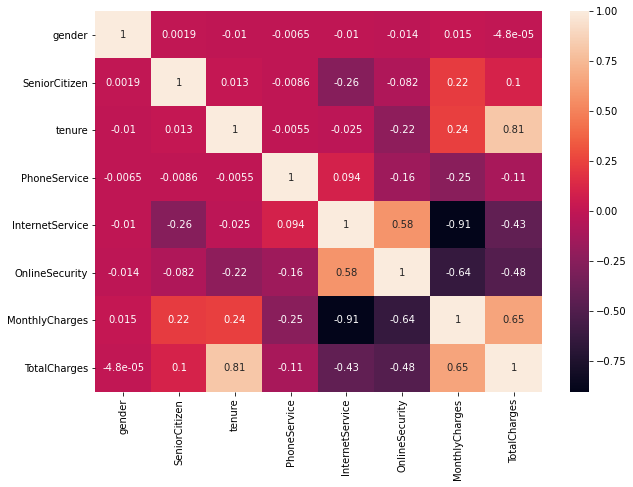

In [156]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

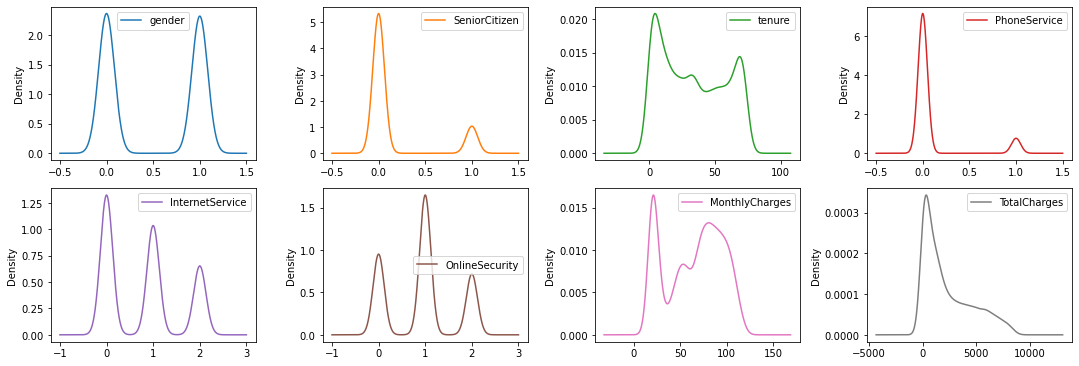

In [157]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(15,10))
plt.tight_layout()

In [164]:
data_info = data.describe()

In [165]:
data_info.loc['median']=data.median()

In [166]:
data_info.loc['median']

gender                0.00
SeniorCitizen         0.00
tenure               31.00
PhoneService          0.00
InternetService       1.00
OnlineSecurity        1.00
MonthlyCharges       70.35
TotalCharges       1400.55
Name: median, dtype: float64

In [171]:
def offer(row):
    if row['gender']==0 and row['tenure']>=30:
        return "An_Old_Men_Agent"
    elif row['gender']==0 and row['tenure']<=30:
        return "An_younger_Men_Agent"
    elif row['gender']==1 and row['tenure']>=30:
        return "An_Old_Women_Agent"
    elif row['gender']==1 and row['tenure']<=30:
        return "An_younger_Women_Agent"
    else:
        return "Other"

In [172]:
data['offer']=data.apply(offer,axis=1)

In [173]:
data.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
0,7590-VHVEG,1,0.0,No,33.041473,1,No phone service,1,1,Yes,...,No,No,No,Month-to-month,Yes,0,29.85,29.85,No,An_Old_Women_Agent
1,5575-GNVDE,0,0.0,No,34.000000,0,No,1,0,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,An_Old_Men_Agent
2,3668-QPYBK,0,0.0,No,2.000000,0,No,1,0,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,An_younger_Men_Agent
3,7795-CFOCW,0,0.0,No,45.000000,1,No phone service,1,0,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,An_Old_Men_Agent
4,9237-HQITU,1,0.0,No,2.000000,0,No,0,1,No,...,No,No,No,Month-to-month,Yes,0,70.70,151.65,Yes,An_younger_Women_Agent


In [185]:
data.offer.value_counts()

An_Old_Men_Agent          1842
An_Old_Women_Agent        1779
An_younger_Men_Agent      1713
An_younger_Women_Agent    1709
Name: offer, dtype: int64

In [174]:
data[['gender','offer']]

,gender,offer
0,1,An_Old_Women_Agent
1,0,An_Old_Men_Agent
2,0,An_younger_Men_Agent
3,0,An_Old_Men_Agent
4,1,An_younger_Women_Agent
...,...,...
7038,0,An_younger_Men_Agent
7039,1,An_Old_Women_Agent
7040,1,An_younger_Women_Agent
7041,0,An_younger_Men_Agent


In [177]:
df=data[(data['gender']==0) & (data['offer']=='An_Old_Men_Agent')]

In [178]:
df

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,offer
1,5575-GNVDE,0,0.0,No,34.0,0,No,1,0,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,An_Old_Men_Agent
3,7795-CFOCW,0,0.0,No,45.0,1,No phone service,1,0,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,An_Old_Men_Agent
9,6388-TABGU,0,0.0,Yes,62.0,0,No,1,0,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,An_Old_Men_Agent
12,8091-TTVAX,0,0.0,No,58.0,0,Yes,0,1,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,An_Old_Men_Agent
13,0280-XJGEX,0,0.0,No,49.0,0,Yes,0,1,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,An_Old_Men_Agent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,0,0.0,No,72.0,0,Yes,0,1,Yes,...,No,Yes,Yes,One year,Yes,0,104.95,7544.30,No,An_Old_Men_Agent
7024,7398-LXGYX,0,0.0,No,44.0,0,Yes,0,0,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No,An_Old_Men_Agent
7031,3605-JISKB,0,1.0,No,55.0,0,Yes,1,0,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No,An_Old_Men_Agent
7033,9767-FFLEM,0,0.0,No,38.0,0,No,0,1,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,An_Old_Men_Agent


C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


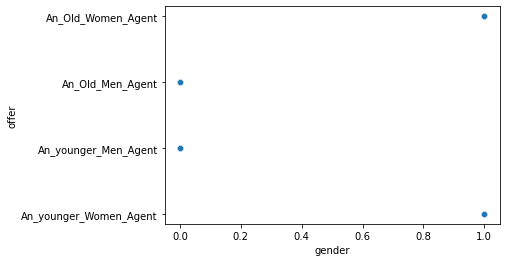

In [182]:
sns.scatterplot('gender','offer',data=data,alpha=0.9
  , legend=True,palette=("ch:2,r=.2,l=.6"))
plt.show()

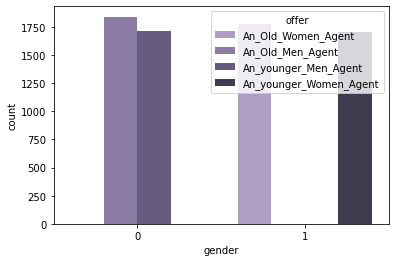

In [195]:
sns.countplot(x='gender',hue='offer',data=data,alpha=0.9,palette=("ch:6,r=.1,l=.6"))
plt.show()

ValueError: could not convert string to float: 'offer'

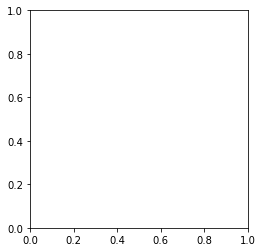

In [199]:
plt.pie('offer', labels='gender', colors=True, explode=True)
plt.axis('equal')

In [207]:
def offer1(row):
    if row['gender']==0 and row['tenure']>=30 and row['TotalCharges']>=4000:
        return "Excellent_Men_Agent"
    elif row['gender']==0 and row['tenure']<=30 and row['TotalCharges']<=4000:
        return "Good_Men_Agent"
    elif row['gender']==1 and row['tenure']>=30 and row['TotalCharges']>=4000:
        return "Excellent_Women_Agent"
    elif row['gender']==1 and row['tenure']<=30 and row['TotalCharges']>=4000:
        return "Good_Women_Agent"
    else:
        return "Other"

In [208]:
data['offer1']=data.apply(offer1,axis=1)

In [209]:
data['offer1']

0                       Other
1                       Other
2              Good_Men_Agent
3                       Other
4                       Other
                ...          
7038           Good_Men_Agent
7039    Excellent_Women_Agent
7040                    Other
7041           Good_Men_Agent
7042      Excellent_Men_Agent
Name: offer1, Length: 7043, dtype: object

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


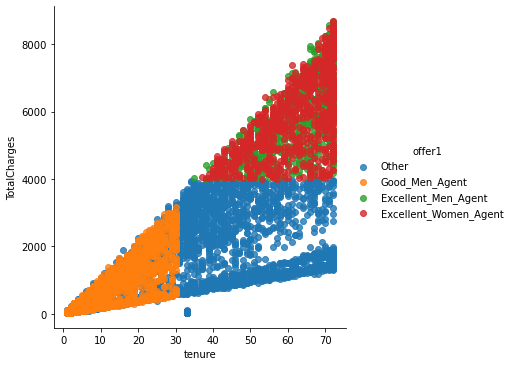

In [211]:
sns.lmplot('tenure', 'TotalCharges', data=data, hue='offer1', fit_reg=False, height=5)
plt.show()

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


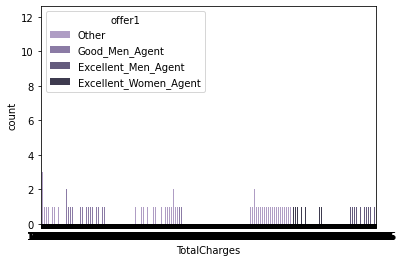

In [214]:
sns.countplot('TotalCharges', hue='offer1',data=data,alpha=0.9,palette=("ch:6,r=.1,l=.6"))
plt.show()

C:\Users\Qebaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


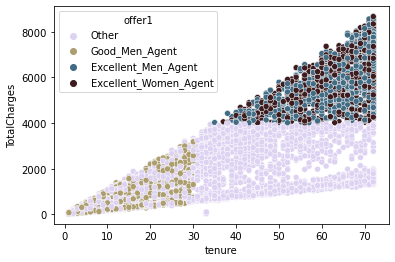

In [218]:
x1= data['tenure']
y2= data['TotalCharges']
sns.scatterplot(x1,y2, data=data, hue='offer1',palette= 'ch:s=2.75,rot=2.50' )
plt.xlabel='tenure'
plt.ylael='TotalCharges'
plt.show()
